# DATA 620  ~  3.2
---
### David Moste - Euclid zhang - Samuel Reeves
---

Presentation Video Link: To Be Done

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import pandas as pd

PYTHONHASHSEED = 1337

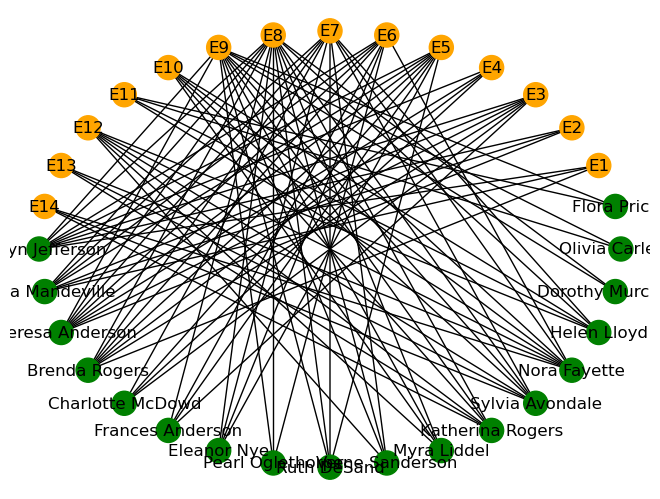

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

colors = ['Green' if node in women else 'Orange' for node in G.nodes]

plt.figsize = (20,20)
nx.draw_shell(G, with_labels=True, node_color = colors)
plt.show()

> This Graph is a bit too busy to read well.  It doesn't show the guests in any meaningful order.  It's basically a 'hairball'.

## Focus on attendees

> Perhaps it may be interesting to know who has no connection to whom: viewing each connection between a person and an event as connections among all people who attended that event.

> In this way, perhaps we can find out something about close-knit clusters or people who participate considerably less than the rest.

In [3]:
# Project bipartite graph onto women nodes keeping number of co-occurence
W = bipartite.weighted_projected_graph(G, women)

# Degree, Eigenvector Centrality and Betweenness are weighted by the total
# number of shared contacts.  DEGREE_CENTRALITY and CLOSENESS are not weighted
summaries = pd.DataFrame(dict(
    DEGREE = dict(W.degree(weight = 'weight')),
    DEGREE_CENTRALITY = nx.degree_centrality(W),
    EIGENVECTOR = nx.eigenvector_centrality(W, weight = 'weight'),
    CLOSENESS = nx.closeness_centrality(W),
    BETWEENNESS = nx.betweenness_centrality(W, weight = 'weight')))

summaries = summaries.sort_values(by = 'DEGREE', ascending = False)
summaries

,DEGREE,DEGREE_CENTRALITY,EIGENVECTOR,CLOSENESS,BETWEENNESS
Theresa Anderson,57,1.000000,0.353554,1.000000,0.000668
Evelyn Jefferson,50,1.000000,0.318519,1.000000,0.000668
Brenda Rogers,46,0.882353,0.304244,0.894737,0.003326
Sylvia Avondale,46,1.000000,0.272878,1.000000,0.018464
Laura Mandeville,45,0.882353,0.300407,0.894737,0.003326
Nora Fayette,43,1.000000,0.253274,1.000000,0.010924
Ruth DeSand,40,1.000000,0.248510,1.000000,0.000668
Verne Sanderson,38,1.000000,0.230700,1.000000,0.018464
Katherina Rogers,37,0.941176,0.221976,0.944444,0.053729
Eleanor Nye,36,0.882353,0.239037,0.894737,0.004552


> Theresa Anderson and Evelyn Jefferson are the most popular persons (high degree) in the network. They also have the strongest influence (high eigenvector and high closeness).

> Olivia Carleton and Flora Price are not so active (low degree) in the network. They mostly function as "bridges" (high betweenness) in the network.  I wonder what this means..?

### Raising the water level

> Let's take a look at some graphs based on the computed features of the data.  We can see that the degrees of the members of the group are somewhat normally distributed with a left skew.  There are a couple of reclusive members of the group.  In terms of degree centrality, eigenvector centrality, and closeness, we see a small group on the far left of the distribution, 2 or 3 people, and what seems like a clique on the right which is considerably involved in social life.

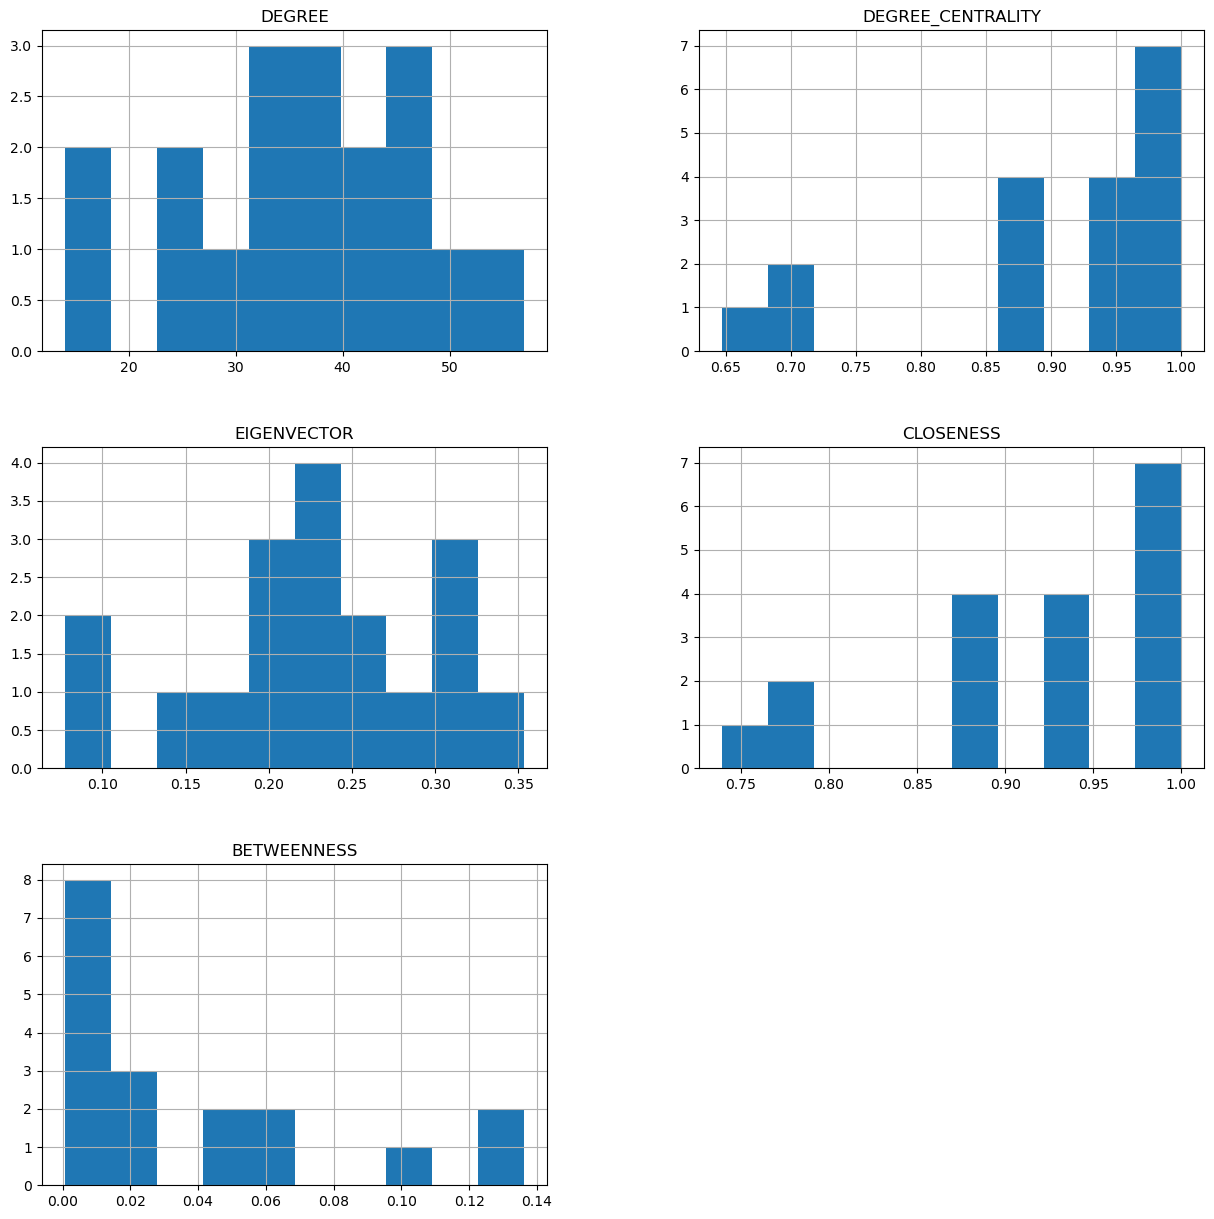

In [4]:
summaries.hist(bins = 10, figsize = (15, 15))
plt.show()

> To clarify these basic observations, the text suggests we can trim away the edges of the network with lesser weights to reveal the core of the network.  The unaltered graph is a hairball:

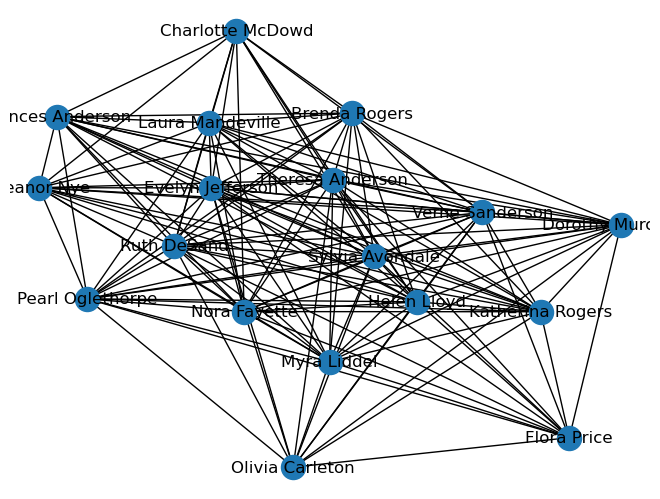

In [5]:
nx.draw(W, with_labels=True)
plt.show()

> Here is an adapted version of the trimming method given in the text.  We begin by calling the method with a weight of 1 and gradually raising the tide until something interesting happens.

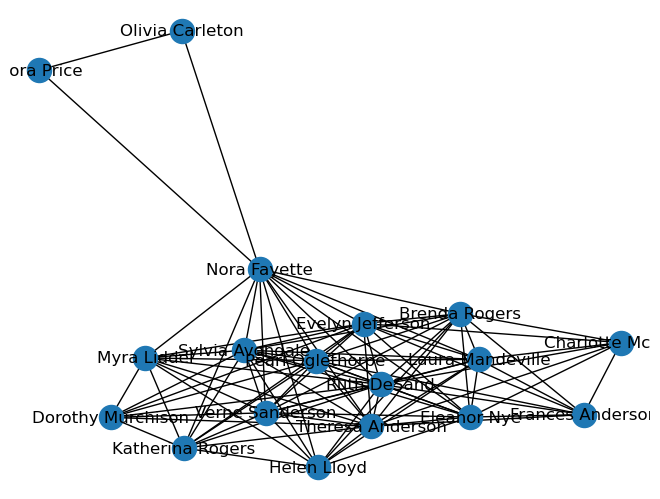

In [6]:
def trim_edges(G, weight = 1):
    W2 = nx.Graph()
    edata = nx.to_pandas_edgelist(G)
    f = edata['source']
    to = edata['target']
    
    for f, to, edata in G.edges(data = True):
        if edata['weight'] > weight:
            W2.add_edge(f, to)
    return W2

nx.draw(trim_edges(W, 1),
        with_labels = True)
plt.show()

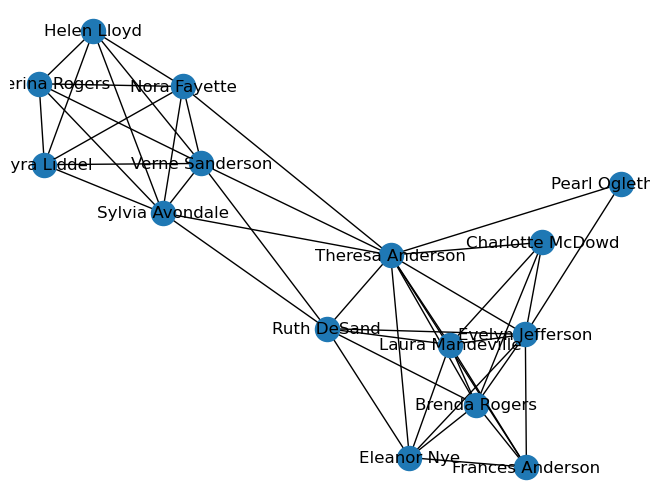

In [23]:
nx.draw(trim_edges(W, 2),
        with_labels = True)
plt.show()

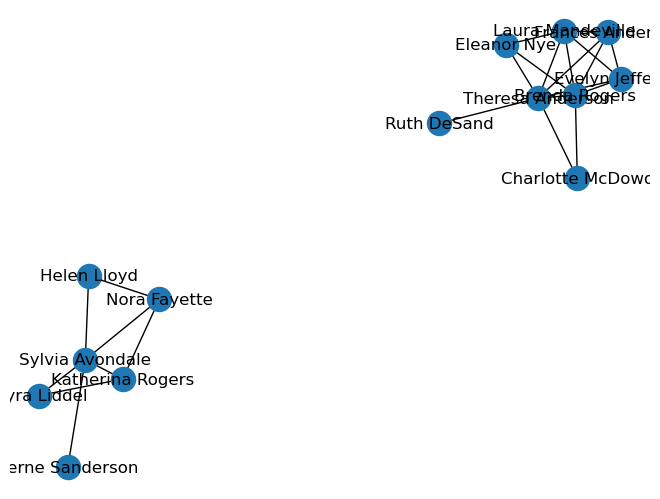

In [16]:
nx.draw(trim_edges(W, 3),
        with_labels = True)
plt.show()

### Network of events

> We can perform the same process on the section of the data that represents the events.  Will this reveal any hidden information?  Since these events aren't people, perhaps this information is less important.

1. Project a bipartite graph
2. Examine some similar statistical features
3. Trim the edges and draw the graph

In [9]:
C = bipartite.weighted_projected_graph(G, clubs)

summaries = pd.DataFrame(dict(
    DEGREE = dict(C.degree(weight='weight')),
    DEGREE_CENTRALITY = nx.degree_centrality(C),
    EIGENVECTOR = nx.eigenvector_centrality(C, weight='weight'),
    CLOSENESS = nx.closeness_centrality(C),
    BETWEENNESS = nx.betweenness_centrality(C, weight='weight')))

summaries = summaries.sort_values(by = 'DEGREE', ascending = False)
summaries

,DEGREE,DEGREE_CENTRALITY,EIGENVECTOR,CLOSENESS,BETWEENNESS
E8,59,1.000000,0.452642,1.000000,0.013889
E7,48,1.000000,0.376992,1.000000,0.028846
E9,46,1.000000,0.351677,1.000000,0.123932
E6,41,1.000000,0.338894,1.000000,0.292491
E5,38,0.615385,0.332678,0.722222,0.000000
E3,32,0.615385,0.276932,0.722222,0.000000
E12,28,0.615385,0.215630,0.722222,0.000000
E10,25,0.615385,0.186924,0.722222,0.000000
E4,23,0.615385,0.202955,0.722222,0.000000
E2,20,0.615385,0.177095,0.722222,0.024573


> E8 is the most popular event (high degree) to the persons in the network. Also, it is the key event (high eigenvector and high closeness) that can spread information to all other events. 

> E6 is not as popular as E8. However, it served (high betweenness) as a bridge to pass information from one set of close events to another set of close events.

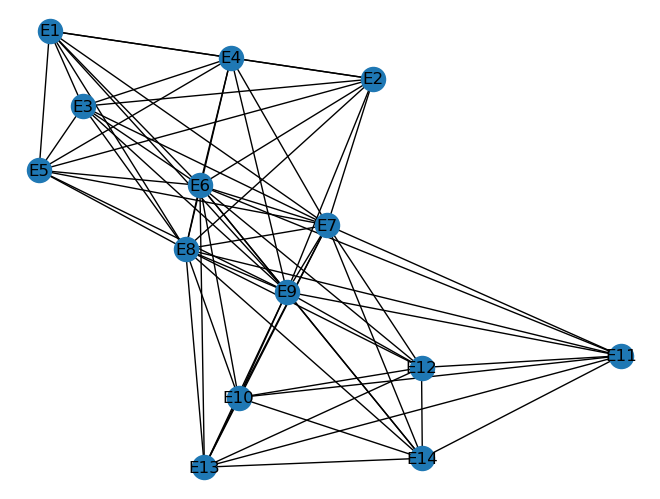

In [10]:
nx.draw(C, with_labels=True)
plt.show()

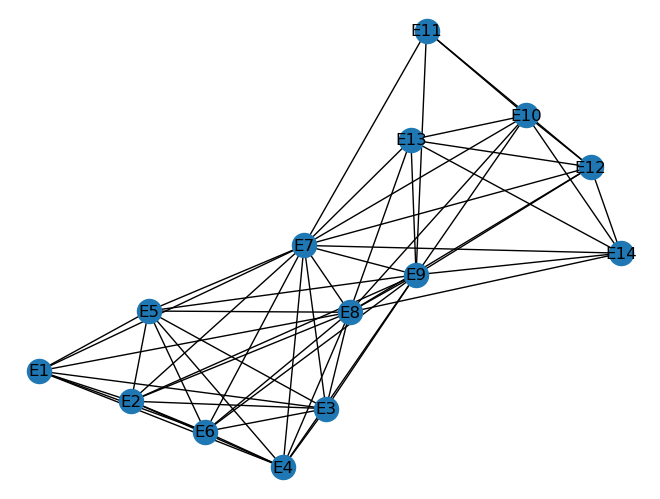

In [11]:
nx.draw(trim_edges(C, 1),
        with_labels = True)
plt.show()

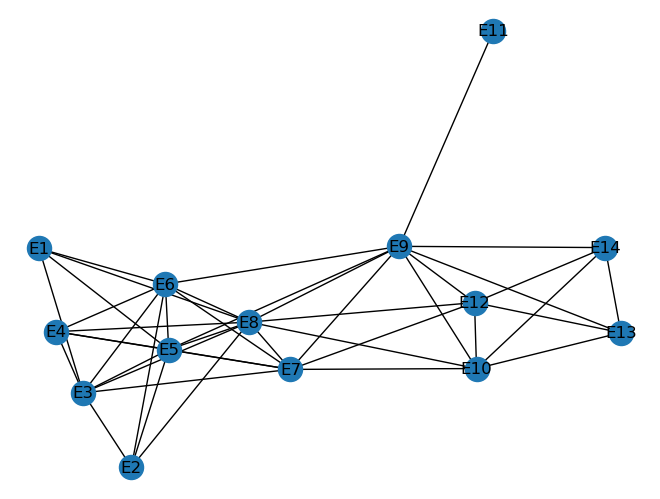

In [17]:
nx.draw(trim_edges(C, 2), with_labels = True)
plt.show()

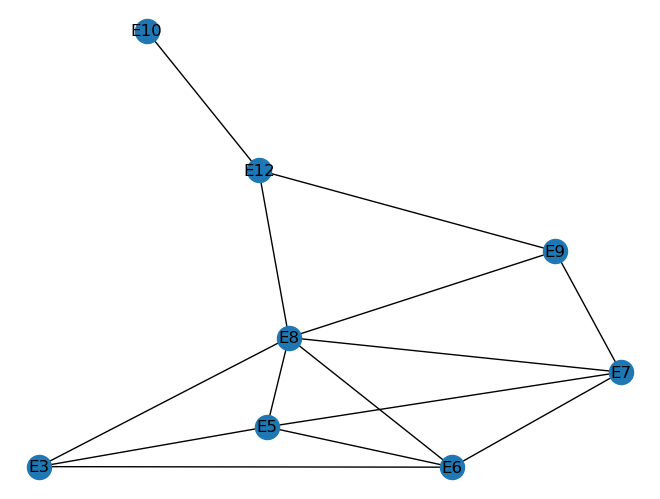

In [19]:
nx.draw(trim_edges(C, 4),
        with_labels = True)
plt.show()

# Conclusions

> It seems that E8 is the most important event to attend if you do not want to be left out.  As far as the events are concerned, the most important are 6, 7, 8, and 9.  This is follows directly from the tables organized by degree.  3, 10, and 12 also seem important for completing the round robin and connecting the two cliques revealed earlier.  This also follows from the numerical observations.

> As mentioned, there are two dominant cliques and two outliers who maybe were not interested in playing politics with their attendance of events.  Were they the most important people because of their ability to bridge the chasm?  Probably not.

> I personally would want to be friends with Theresa Anderson.  She seems cool.

> Pearl Oglethorpe probably has some skeletons in the clost.